### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

### Load Data

In [2]:
dmf = pd.read_csv('data/yun_data/output/covid_socio_2020.csv')
unemp_covid_df = pd.read_csv('data/yun_data/output/unemployment_covid_2020.csv')
covid_df = pd.read_csv('data/yun_data/output/covid_monthly_2020.csv')
df3 = pd.read_csv('data/yun_data/output/unemp_rate_2020.csv')
df4 = pd.read_csv('data/yun_data/output/cov_unemp_summary.csv')

### Modeling : 

In [3]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate'],
      dtype='object')

### Clustering Kmeans -  n_clusters = 2

In [4]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]
#fit the data
model = KMeans(n_clusters=2)
model.fit(X)

# Get the labels and centroids for our first clustering model
k2_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k2_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Location of centroids: 
[[1.78771936e+05 4.65532172e+06 1.46512480e+02 1.69382979e+01
  1.83489362e+01 4.93872340e+01 7.91425532e+01 1.26617021e+01
  1.05787234e+01 8.59574468e+01 9.53191489e+00 2.00191489e+01
  6.52184681e+04 1.21191489e+01 8.16808511e+00 2.63468085e+00
  6.64021277e+01]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01]]


In [5]:
#create third column
dmf['k2_labels'] = k2_labels

dmf.k2_labels.value_counts()

0    47
1     4
Name: k2_labels, dtype: int64

In [6]:
# Compute the silouette score and visually examine the results.
round(silhouette_score(X, k2_labels),2)

0.79

### Clustering Kmeans -  n_clusters = 3

In [7]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]

#fit the data
model = KMeans(n_clusters=3)
model.fit(X)

# Get the labels and centroids for our first clustering model
k3_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 2 0 1 2 0 0 0 1 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 1 2 0 2 0
 0 2 0 0 0 2 1 0 0 2 2 0 2 0]
Location of centroids: 
[[1.98343517e+05 2.35778352e+06 1.78773416e+02 1.71482759e+01
  1.84344828e+01 4.95206897e+01 8.00655172e+01 1.12931034e+01
  1.01034483e+01 8.53000000e+01 9.51379310e+00 1.93724138e+01
  6.31920690e+04 1.25827586e+01 8.39655172e+00 2.63344828e+00
  6.63724138e+01]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01]
 [1.47239944e+05 8.35691106e+06 9.45365275e+01 1.66000000e+01
  1.82111111e+01 4.91722222e+01 7.76555556e+01 1.48666667e+01
  1.13444444e+01 8.70166667e+01 9.56111111e+00 2.10611111e+01
  6.84832222e+04 1.13722222e+01 7.80000000e+00 2.63666667e+00
  6.64500000e+01]]


In [8]:
#create third column
dmf['k3_labels'] = k3_labels
dmf.k3_labels.value_counts()

0    29
2    18
1     4
Name: k3_labels, dtype: int64

In [9]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k3_labels),2)

0.58

### Clustering Kmeans -  n_clusters = 4

In [10]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]

#fit the data
model = KMeans(n_clusters=4)
model.fit(X)

# Get the labels and centroids for our first clustering model
k4_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k4_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 2 0 2 3 0 2 2 2 1 0 2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 2 2 2 0 2 1 0 2 0 2
 2 0 2 2 2 0 1 2 2 0 0 2 0 2]
Location of centroids: 
[[1.47239944e+05 8.35691106e+06 9.45365275e+01 1.66000000e+01
  1.82111111e+01 4.91722222e+01 7.76555556e+01 1.48666667e+01
  1.13444444e+01 8.70166667e+01 9.56111111e+00 2.10611111e+01
  6.84832222e+04 1.13722222e+01 7.80000000e+00 2.63666667e+00
  6.64500000e+01]
 [3.35757000e+05 2.33090597e+07 1.01822563e+02 1.69000000e+01
  1.82666667e+01 4.90333333e+01 7.29333333e+01 1.62333333e+01
  2.84666667e+01 8.66333333e+01 1.31333333e+01 2.01666667e+01
  6.51230000e+04 1.31000000e+01 1.22666667e+01 2.79000000e+00
  6.05333333e+01]
 [1.98343517e+05 2.35778352e+06 1.78773416e+02 1.71482759e+01
  1.84344828e+01 4.95206897e+01 8.00655172e+01 1.12931034e+01
  1.01034483e+01 8.53000000e+01 9.51379310e+00 1.93724138e+01
  6.31920690e+04 1.25827586e+01 8.39655172e+00 2.63344828e+00
  6.63724138e+01]
 [4.23967000e+05 3.95122230e+07 9.31964587

In [11]:
#create third column
dmf['k4_labels'] = k4_labels
dmf.k4_labels.value_counts()

2    29
0    18
1     3
3     1
Name: k4_labels, dtype: int64

In [12]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k4_labels),2)

0.58

### Clustering Kmeans -  n_clusters = 6

In [13]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]

#fit the data
model = KMeans(n_clusters=6)
model.fit(X)

# Get the labels and centroids for our first clustering model
k6_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k6_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [3 0 3 0 4 3 0 0 0 5 2 0 0 2 3 0 0 3 3 0 3 3 2 3 0 3 0 0 0 0 2 0 5 2 0 2 3
 3 2 0 3 0 3 1 0 0 2 3 0 3 0]
Location of centroids: 
[[2.11178739e+05 1.78402817e+06 2.16124511e+02 1.71521739e+01
  1.84130435e+01 4.96695652e+01 8.10391304e+01 9.41739130e+00
  1.08260870e+01 8.57304348e+01 8.88260870e+00 1.99173913e+01
  6.52058261e+04 1.19000000e+01 8.09565217e+00 2.63869565e+00
  6.62521739e+01]
 [6.95662000e+05 2.89958810e+07 4.16809902e+01 1.29000000e+01
  2.12000000e+01 4.96000000e+01 7.59000000e+01 1.35000000e+01
  3.97000000e+01 8.64000000e+01 1.54000000e+01 2.00000000e+01
  6.40340000e+04 1.36000000e+01 1.84000000e+01 2.99000000e+00
  6.19000000e+01]
 [1.32817375e+05 1.07091229e+07 1.18350835e+02 1.66875000e+01
  1.81250000e+01 4.89625000e+01 7.37875000e+01 1.88750000e+01
  1.06000000e+01 8.63625000e+01 1.00250000e+01 2.06875000e+01
  6.65505000e+04 1.19500000e+01 8.26250000e+00 2.64250000e+00
  6.63500000e+01]
 [1.55164438e+05 5.75590562e+06 6.05260080

In [14]:
#create third column
dmf['k6_labels'] = k6_labels
dmf.k6_labels.value_counts()

0    23
3    16
2     8
5     2
4     1
1     1
Name: k6_labels, dtype: int64

In [15]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k3_labels),2)

0.58

### Clustering Kmeans -  n_clusters = 8

In [16]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]

#fit the data
model = KMeans(n_clusters=8)
model.fit(X)

# Get the labels and centroids for our first clustering model
k8_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k8_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [6 0 2 6 3 2 6 0 0 1 7 0 0 4 2 6 6 6 6 0 2 2 7 2 6 2 0 0 6 0 7 0 1 7 0 4 6
 6 4 0 2 0 2 5 6 0 7 2 0 2 0]
Location of centroids: 
[[2.32154750e+05 1.19493188e+06 2.88515087e+02 1.76000000e+01
  1.79000000e+01 4.97875000e+01 8.18625000e+01 7.62500000e+00
  9.95625000e+00 8.62000000e+01 8.25625000e+00 2.03625000e+01
  6.64576875e+04 1.14937500e+01 7.68125000e+00 2.60375000e+00
  6.63625000e+01]
 [1.55804500e+05 2.04656490e+07 1.31893349e+02 1.89000000e+01
  1.68000000e+01 4.87500000e+01 7.14500000e+01 1.76000000e+01
  2.28500000e+01 8.67500000e+01 1.20000000e+01 2.02500000e+01
  6.56675000e+04 1.28500000e+01 9.20000000e+00 2.69000000e+00
  5.98500000e+01]
 [1.51883000e+05 6.35455727e+06 7.42666932e+01 1.66818182e+01
  1.82454545e+01 4.92454545e+01 7.96636364e+01 1.31454545e+01
  1.13818182e+01 8.71181818e+01 9.41818182e+00 2.10909091e+01
  6.87746364e+04 1.11727273e+01 7.73636364e+00 2.62727273e+00
  6.68727273e+01]
 [4.23967000e+05 3.95122230e+07 9.31964587

In [17]:
#create third column
dmf['k8_labels'] = k8_labels
dmf.k8_labels.value_counts()

0    16
6    12
2    11
7     5
4     3
1     2
5     1
3     1
Name: k8_labels, dtype: int64

In [18]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k8_labels),2)

0.58

### Clustering Kmeans -  n_clusters = 10

In [19]:
# Data for clustering
X = dmf[['Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]

#fit the data
model = KMeans(n_clusters=10)
model.fit(X)

# Get the labels and centroids for our first clustering model
k10_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k10_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [9 6 7 0 3 4 0 6 6 5 8 6 6 2 4 0 0 9 9 6 4 4 8 4 0 4 6 6 0 6 7 6 5 8 6 2 9
 9 2 6 9 6 4 1 0 6 7 7 6 4 6]
Location of centroids: 
[[1.63233571e+05 3.13053400e+06 5.06603364e+01 1.61285714e+01
  1.95857143e+01 4.94000000e+01 7.91571429e+01 1.35142857e+01
  1.28142857e+01 8.46571429e+01 1.03142857e+01 1.89000000e+01
  6.23444286e+04 1.28285714e+01 9.04285714e+00 2.71857143e+00
  6.60000000e+01]
 [6.95662000e+05 2.89958810e+07 4.16809902e+01 1.29000000e+01
  2.12000000e+01 4.96000000e+01 7.59000000e+01 1.35000000e+01
  3.97000000e+01 8.64000000e+01 1.54000000e+01 2.00000000e+01
  6.40340000e+04 1.36000000e+01 1.84000000e+01 2.99000000e+00
  6.19000000e+01]
 [1.28457667e+05 1.23876367e+07 9.74972904e+01 1.74333333e+01
  1.78333333e+01 4.90333333e+01 7.97333333e+01 1.42333333e+01
  9.76666667e+00 8.59000000e+01 9.46666667e+00 1.98000000e+01
  6.37640000e+04 1.22000000e+01 6.60000000e+00 2.58666667e+00
  6.68000000e+01]
 [4.23967000e+05 3.95122230e+07 9.31964587

In [20]:
#create third column
dmf['k10_labels'] = k10_labels
dmf.k10_labels.value_counts()

6    16
4     8
0     7
9     6
7     4
8     3
2     3
5     2
3     1
1     1
Name: k10_labels, dtype: int64

In [21]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X, k10_labels),2)

0.56

### Result

In [22]:
dmf[['Name','k2_labels']].sort_values('k2_labels')

,Name,k2_labels
0,Alabama,0
26,Montana,0
27,Nebraska,0
28,Nevada,0
29,New Hampshire,0
30,New Jersey,0
31,New Mexico,0
33,North Carolina,0
34,North Dakota,0
35,Ohio,0


In [23]:
dmf[['Name','k3_labels']].sort_values('k3_labels')

,Name,k3_labels
0,Alabama,0
24,Mississippi,0
26,Montana,0
27,Nebraska,0
28,Nevada,0
29,New Hampshire,0
31,New Mexico,0
34,North Dakota,0
36,Oklahoma,0
37,Oregon,0


In [24]:
dmf[['Name','k8_labels']].sort_values('k8_labels')

,Name,k8_labels
50,Wyoming,0
26,Montana,0
19,Maine,0
27,Nebraska,0
29,New Hampshire,0
31,New Mexico,0
34,North Dakota,0
39,Rhode Island,0
12,Idaho,0
11,Hawaii,0


In [25]:
dmf[dmf['k3_labels']== 0]['Name'].values

array(['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Delaware',
       'District of Columbia', 'Hawaii', 'Idaho', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mississippi', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Utah', 'Vermont',
       'West Virginia', 'Wyoming'], dtype=object)

In [26]:
dmf[dmf['k3_labels']== 1]['Name'].values

array(['California', 'Florida', 'New York', 'Texas'], dtype=object)

In [27]:
dmf[dmf['k3_labels']== 2]['Name'].values

array(['Arizona', 'Colorado', 'Georgia', 'Illinois', 'Indiana',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri',
       'New Jersey', 'North Carolina', 'Ohio', 'Pennsylvania',
       'Tennessee', 'Virginia', 'Washington', 'Wisconsin'], dtype=object)

### Social Features

<ipython-input-28-e78ae46eb866>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


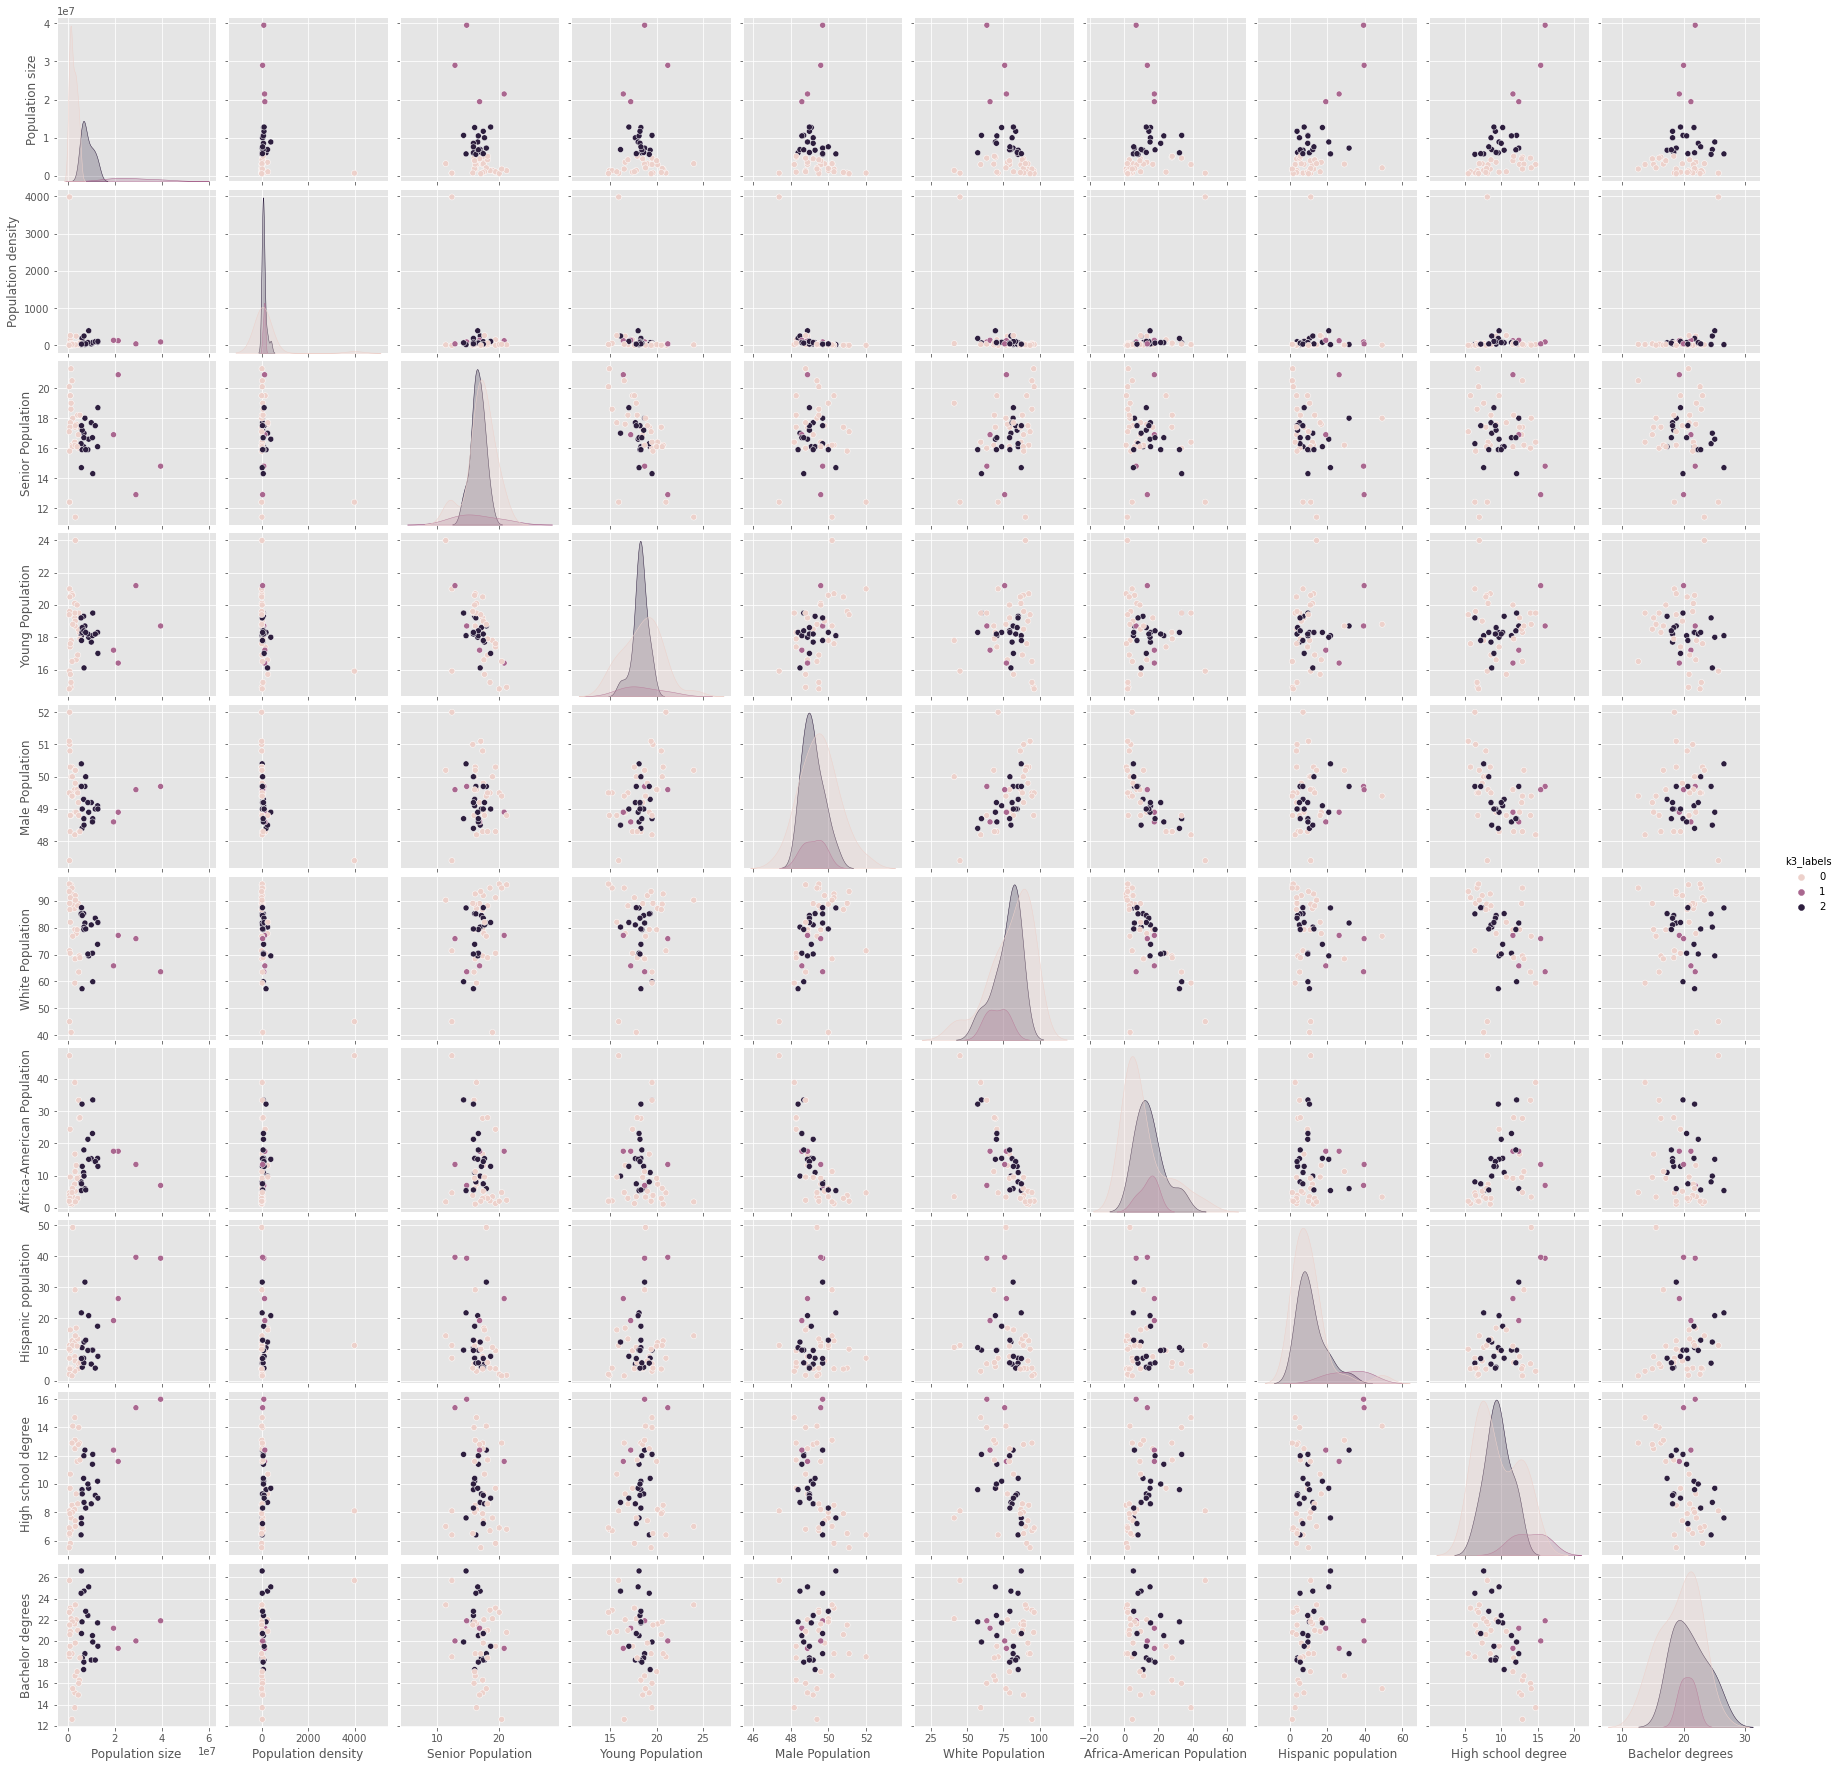

In [28]:
# visually examine the cluster that have been created
k3 = dmf[['Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population','High school degree',
       'Bachelor degrees']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Economic Features

<ipython-input-29-70d544b55f06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


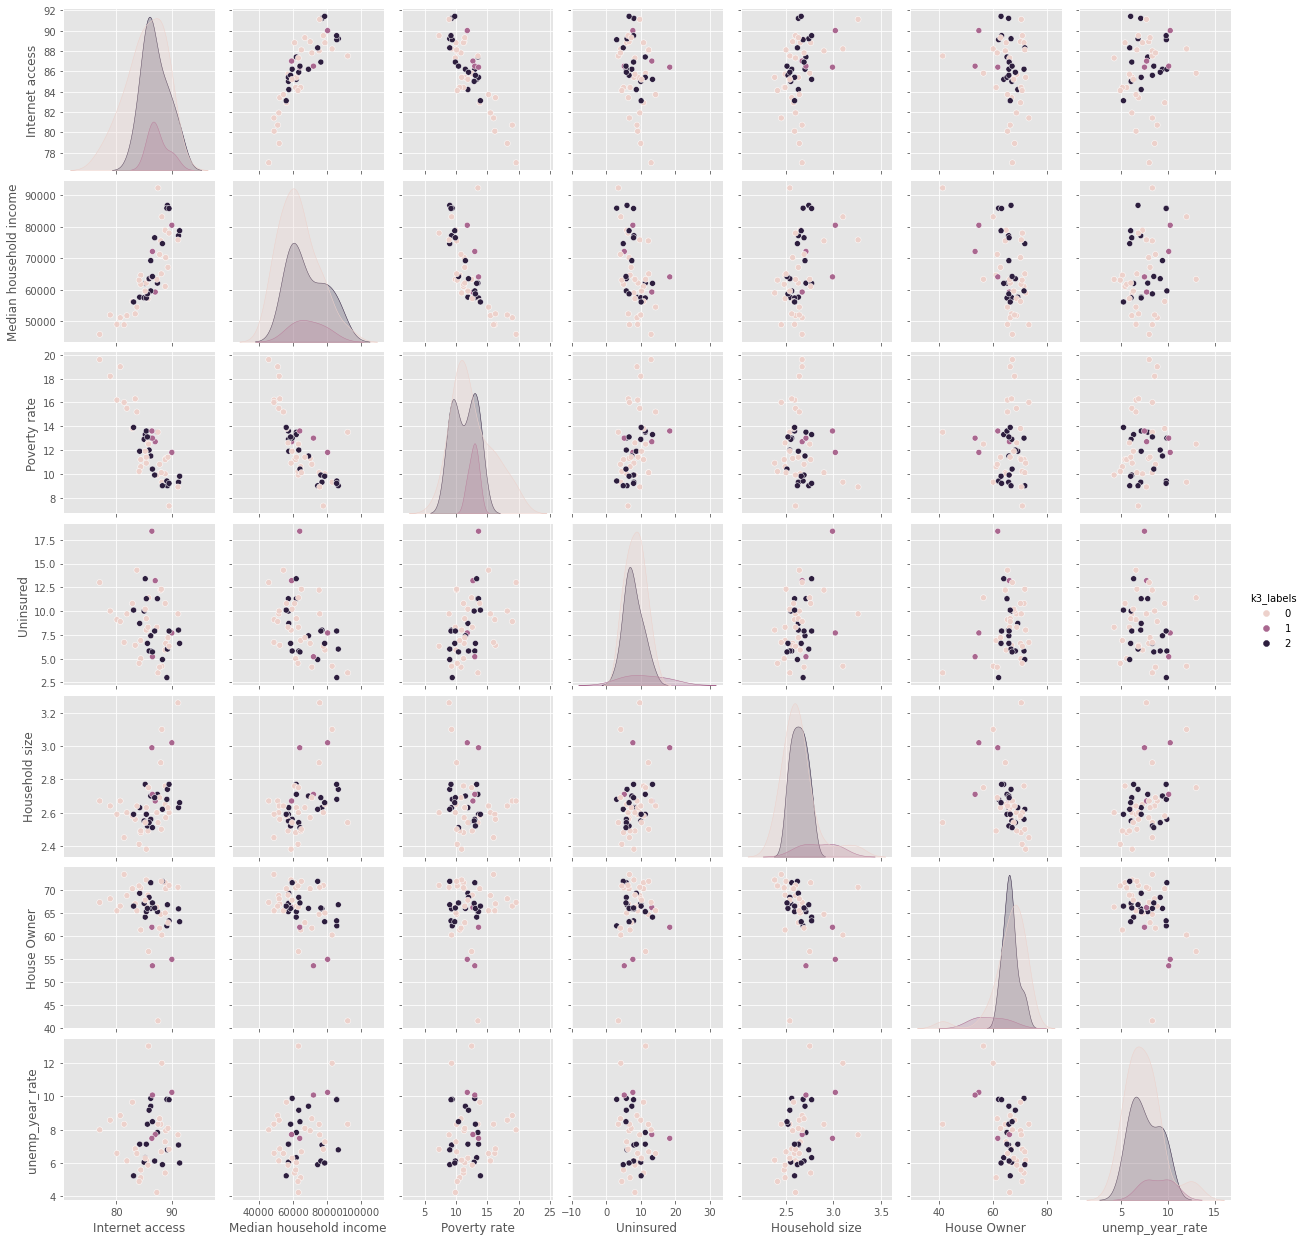

In [29]:
# visually examine the cluster that have been created
k3 = dmf[['Internet access', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','unemp_year_rate']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Medical Features

<ipython-input-30-935da8183ada>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


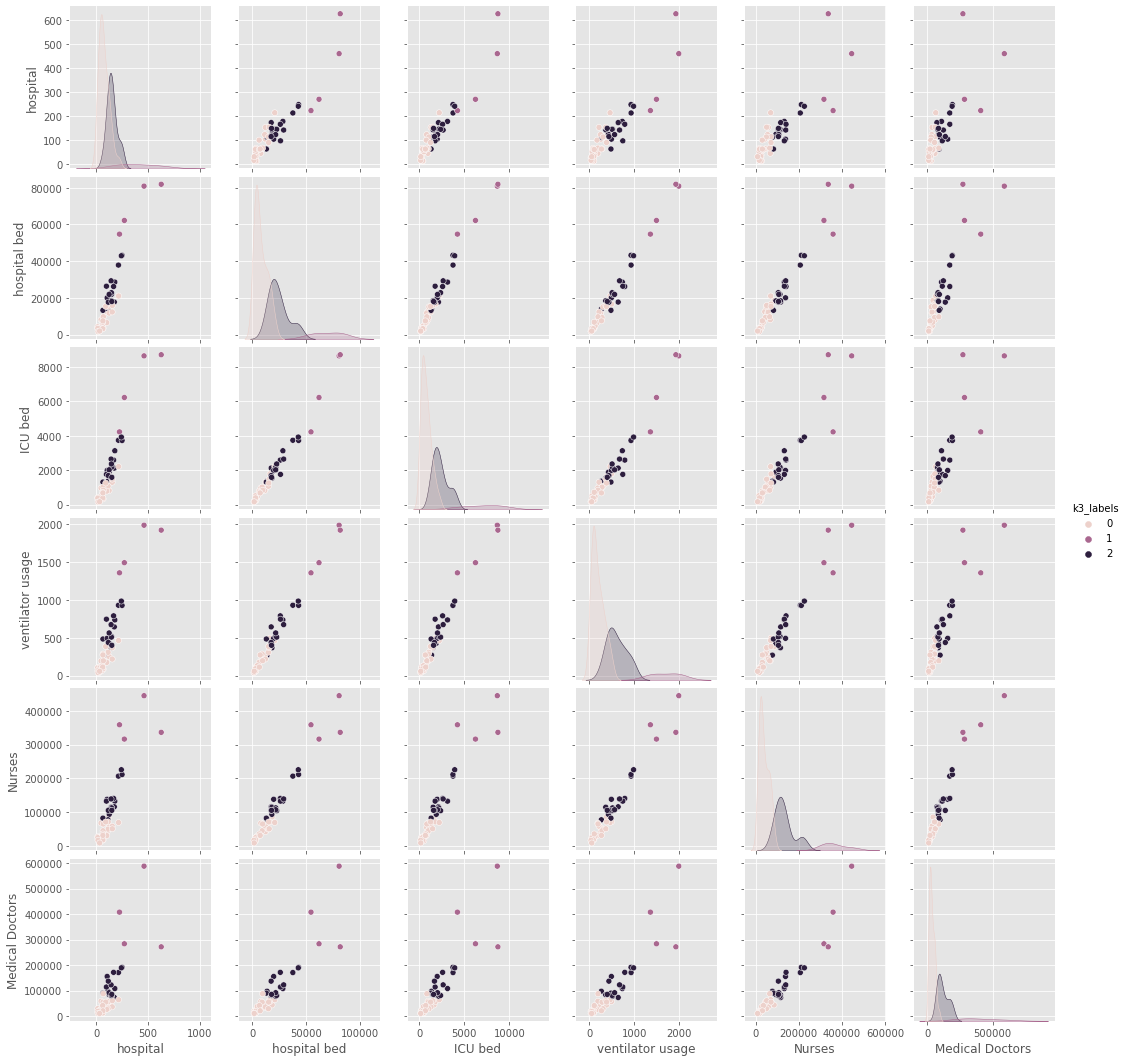

In [30]:
# visually examine the cluster that have been created
k3 = dmf[['hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Conclution :


model Features :

'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner'

Our questions: 


Can we use (socioeconomic, demographic, and employment data) to cluster states with higher risk of being affected by a pandemic to allot resources to those areas for future disproportionate effect mitigation?

Answer:


Yes!!!!! 

Please see the state cluster 1 and see the bar chart below.


Please see the state cluster 2 and see the bar chart below.


Please see the state cluster 0 and see the bar chart below.

So from Socioeconomic, we can predict the 4 highest death covid number states  

In [31]:
'''
cluster 0 = 'Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Delaware',
       'District of Columbia', 'Hawaii', 'Idaho', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mississippi', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Utah', 'Vermont',
       'West Virginia', 'Wyoming'
       
cluster 1 = 'California', 'Florida', 'New York', 'Texas'

cluster 2 = 'Arizona', 'Colorado', 'Georgia', 'Illinois', 'Indiana',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri',
       'New Jersey', 'North Carolina', 'Ohio', 'Pennsylvania',
       'Tennessee', 'Virginia', 'Washington', 'Wisconsin'
'''

"\ncluster 0 = 'Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Delaware',\n       'District of Columbia', 'Hawaii', 'Idaho', 'Iowa', 'Kansas',\n       'Kentucky', 'Louisiana', 'Maine', 'Mississippi', 'Montana',\n       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',\n       'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island',\n       'South Carolina', 'South Dakota', 'Utah', 'Vermont',\n       'West Virginia', 'Wyoming'\n       \ncluster 1 = 'California', 'Florida', 'New York', 'Texas'\n\ncluster 2 = 'Arizona', 'Colorado', 'Georgia', 'Illinois', 'Indiana',\n       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri',\n       'New Jersey', 'North Carolina', 'Ohio', 'Pennsylvania',\n       'Tennessee', 'Virginia', 'Washington', 'Wisconsin'\n"

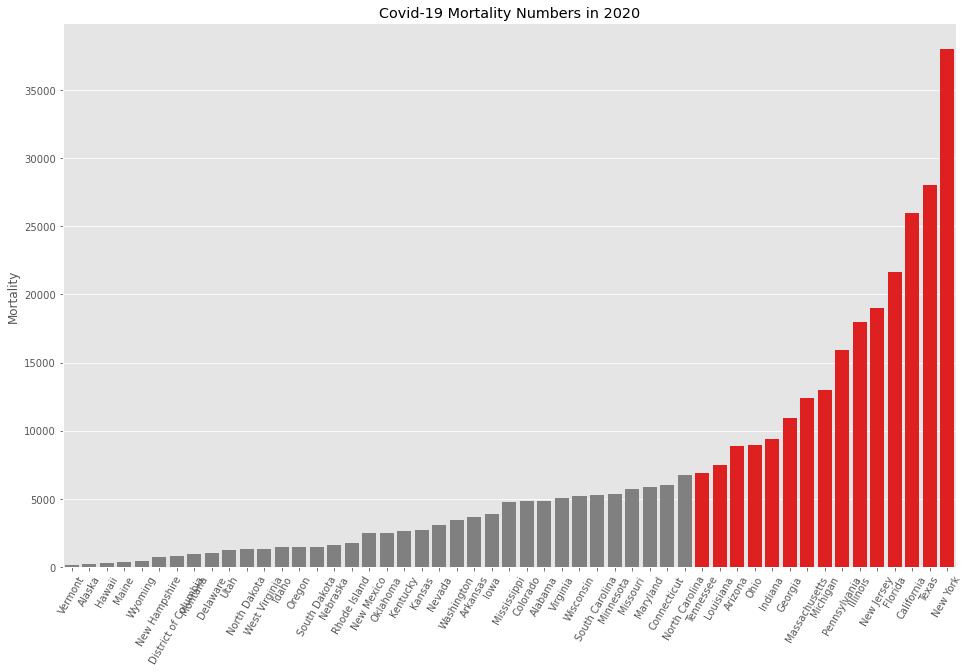

In [32]:
plt.figure(figsize=(16,10)) 

clrs = ['grey' if (x < dmf.Deaths.mean()) else 'red' for x in dmf['Deaths'].sort_values()]
sns.barplot(x='Name', y= 'Deaths', data=dmf.sort_values('Deaths'),palette=clrs)         
plt.title('Covid-19 Mortality Numbers in 2020')
plt.xlabel('')
plt.ylabel('Mortality')
plt.xticks(rotation = 60);